In [42]:
import numpy as np 
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
ss_data=pd.read_csv(r"C:\Users\SAI SANDEEP\Downloads\SampleSuperstore.csv")
print("Data Imported Successfully")
ss_data.head(5)

Data Imported Successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
ss_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
ss_data.shape

(9994, 13)

In [5]:
ss_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
ss_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
ss_data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
ss_data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
ss_data["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [10]:
ss_data["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

- removing the unwanted data in the form of columns 

In [11]:
ss_data.drop(["Country", "Postal Code"], axis=1, inplace=True)

In [12]:
ss_data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [13]:
ss_data.shape

(9994, 11)

In [14]:
ss_data.duplicated().sum()

50

- removing the duplicates 

In [15]:
ss_data.drop_duplicates(inplace=True)

In [16]:
ss_data.duplicated().sum()

0

- finding the `correlation` between various fields 

In [17]:
ss_data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


In [18]:
correlation = ss_data.corr()

- building the `heatmap` of the correlation for better understanding

<AxesSubplot:>

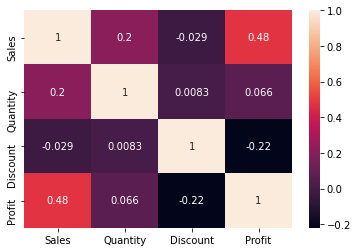

In [19]:
sb.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

- making the `pairplot` of various fields from our dataset 

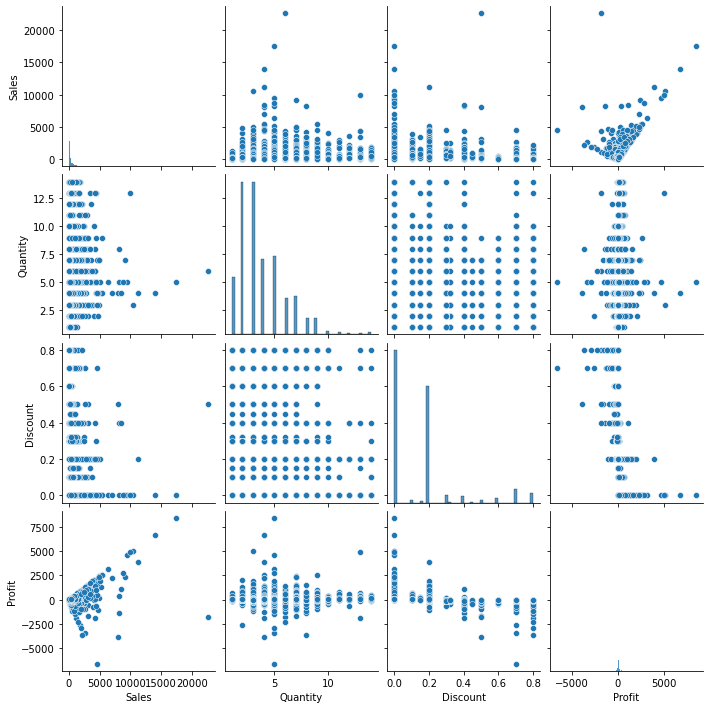

In [20]:
sb.pairplot(ss_data)

- also building the `boxplot` 

<AxesSubplot:>

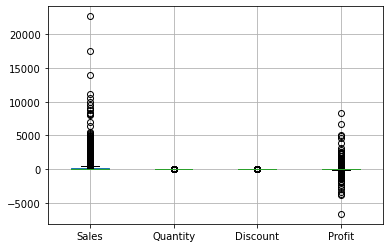

In [21]:
ss_data.boxplot()

- making the pairplot for `region` specific 


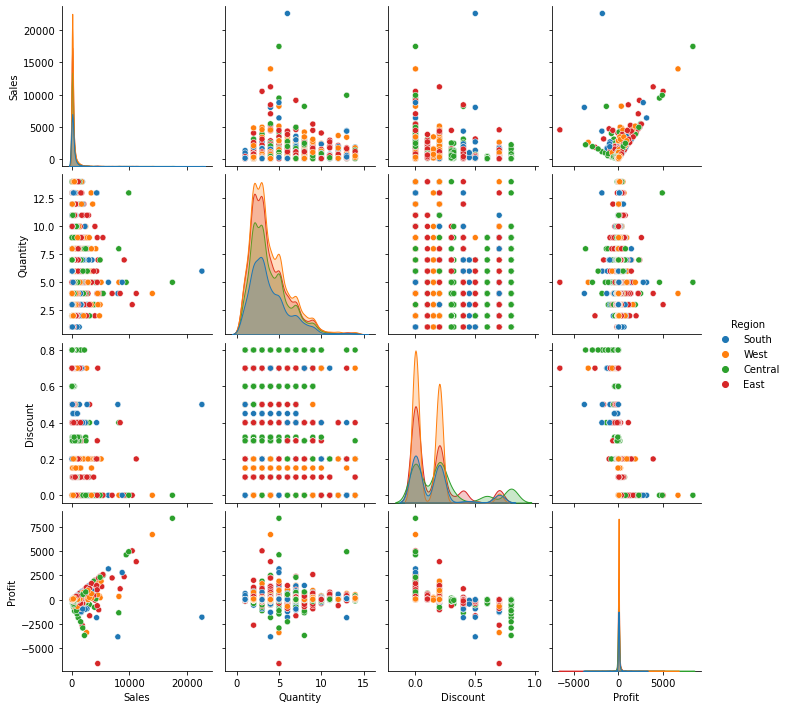

In [22]:
sb.pairplot(data=ss_data, hue="Region")
plt.show()

In [23]:
ss_data["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [24]:
sm = ss_data["Ship Mode"].value_counts()
print(sm)

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

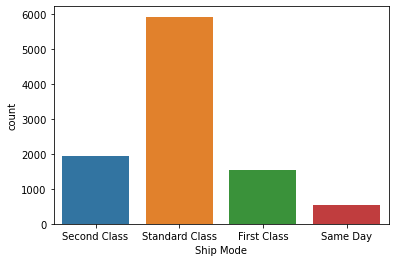

In [25]:
sb.countplot(x=ss_data["Ship Mode"])

In [26]:
psd = ss_data.groupby("Ship Mode")[["Profit", "Sales"]].sum()
psd

,Profit,Sales
Ship Mode,,
First Class,48910.4477,3.512746e+05
Same Day,15871.8869,1.283217e+05
Second Class,57425.5716,4.591240e+05
Standard Class,163889.6517,1.355879e+06


- analysing the relation between profit and sales for different ship modes

Text(0.5, 1.0, 'Profit vs Sales')

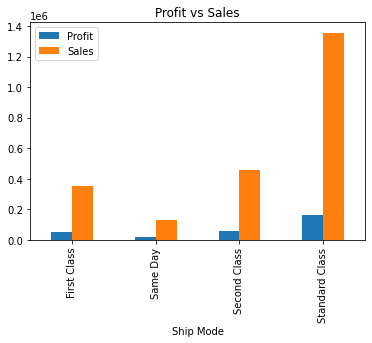

In [27]:
psd.plot(kind="bar")
plt.title("Profit vs Sales")

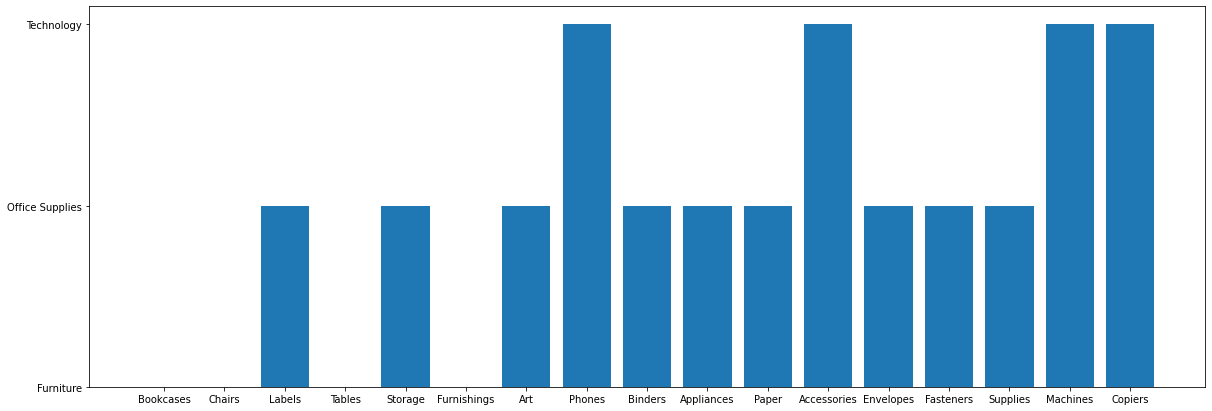

In [31]:
plt.figure(figsize=(20,7))
plt.bar("Sub-Category","Category", data=ss_data)
plt.show()

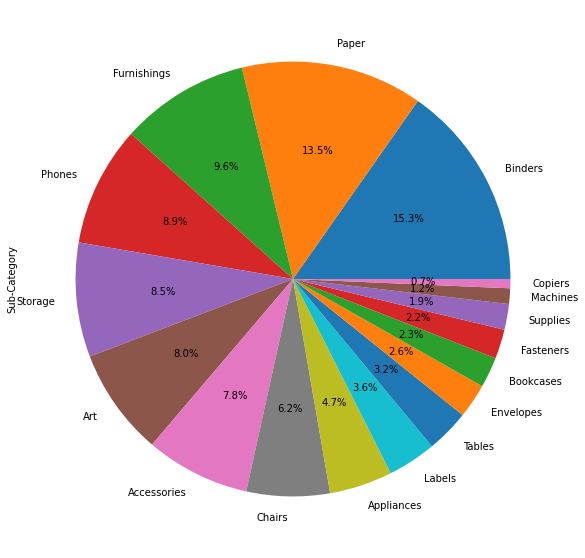

In [33]:
plt.figure(figsize=(10,10))
ss_data['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

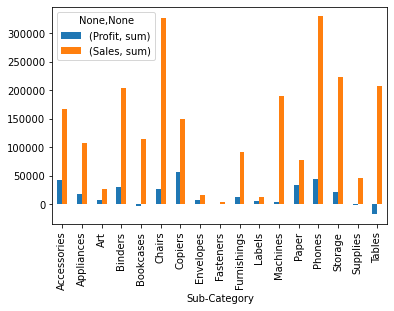

In [43]:
ss_data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

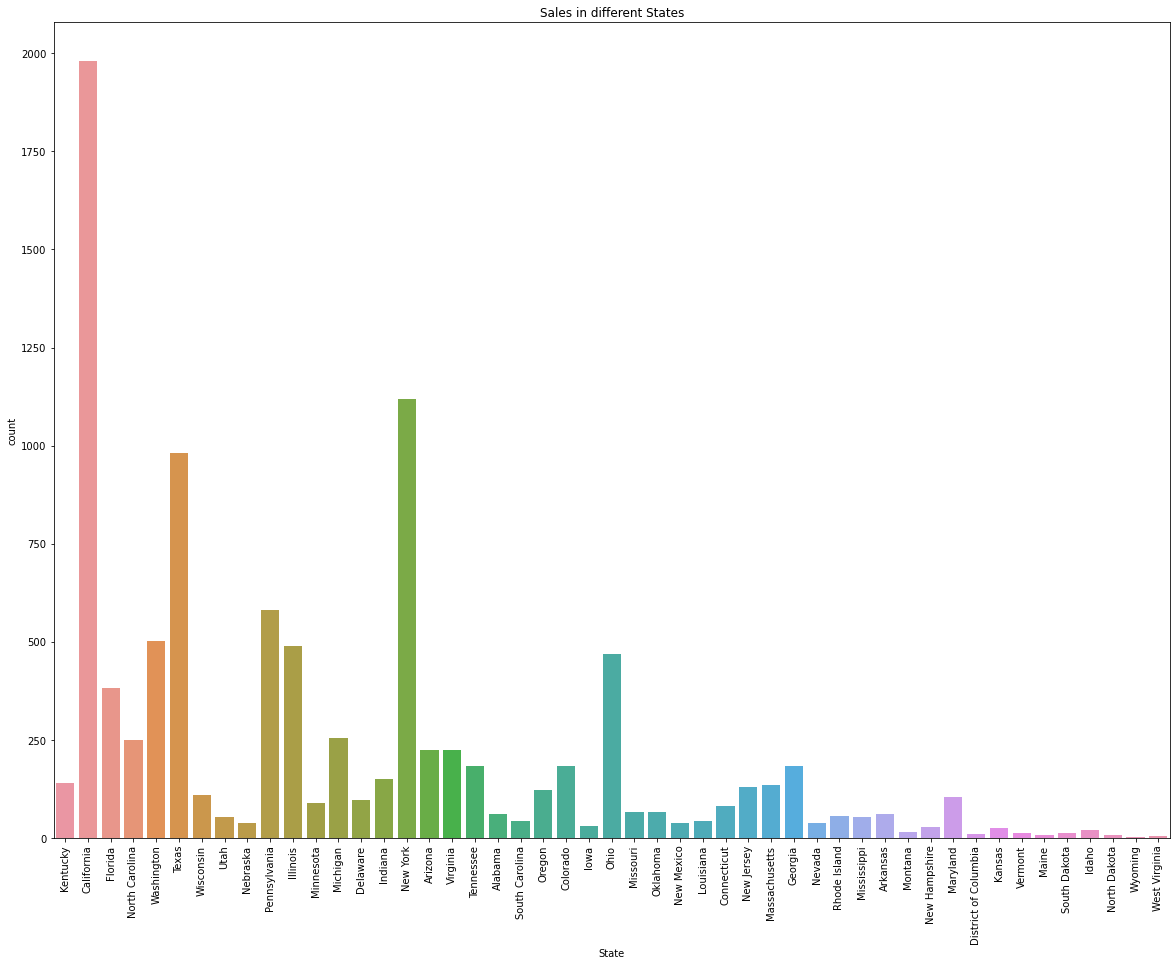

In [40]:
plt.figure(figsize=(20,15))
sb.countplot(x=ss_data['State'])
plt.title("Sales in different States")
plt.xticks(rotation=90)
plt.show()

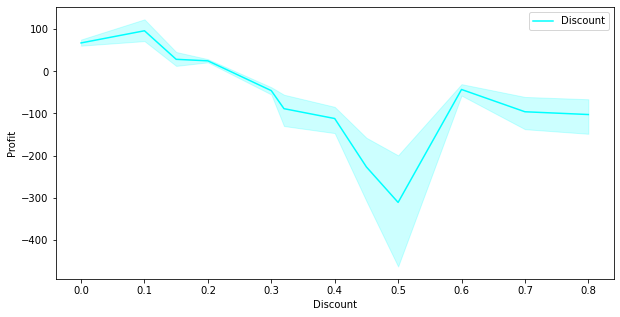

In [45]:
plt.figure(figsize=(10,5))
sb.lineplot("Discount", "Profit", data=ss_data, color='aqua',label='Discount')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

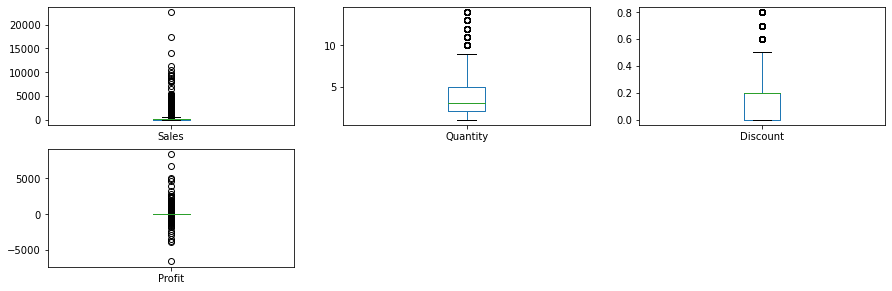

In [48]:
ss_data.plot(kind="box", subplots=True,layout=(4,3), sharex=False, sharey=False)
plt.rcParams['figure.figsize']=[15,10]
plt.show

`Conclusion`
- Sales and the profit has the highest positive correlation 
- Sales and the discount has the highest negative correlation 
- **Paper** and **Binders** tops the sub-category's list 
- **Standard Class** has a great hike when compared to other segments of Shipping mode 
- **Technology** segment is more profitable than the furniture and office supplies
